# K Means Clustering:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\saira\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
retail_df = pd.read_csv('Online+Retail.csv',sep=',',encoding='ISO-8859-1',header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Missing Values:

In [5]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
(retail_df.isnull().sum())/len(retail_df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
round((retail_df.isnull().sum())/len(retail_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
#drop missing values:
retail_df = retail_df.dropna()

In [9]:
retail_df.shape

(406829, 8)

#Data Preparation:
RFM
R-recency
F-frequency
M-monetary

In [10]:
#Monetary:
#new column:amount
retail_df['amount'] =retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [11]:
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()

In [12]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
#frequency:
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()

In [14]:
frequency = frequency.reset_index()

In [15]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [16]:
frequency.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [17]:
frequency.columns = ['CustomerID','frequency']

In [18]:
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [19]:
#merge
grouped_data = pd.merge(grouped_df,frequency,how='inner',on='CustomerID')
grouped_data.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [20]:
#recency:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [21]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [22]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [23]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [25]:
#compute the max date:
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [26]:
#compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [27]:
#recency
recency = retail_df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()

In [28]:
recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [29]:
#merge
grouped_data = pd.merge(grouped_data,recency,on='CustomerID',how='inner')
grouped_data.columns

Index(['CustomerID', 'amount', 'frequency', 'diff'], dtype='object')

In [30]:
grouped_data.columns=['CustomerID', 'amount', 'frequency', 'recency']

In [31]:
grouped_data.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [32]:
#number of days:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
grouped_data['recency'] = grouped_data['recency'].dt.days
grouped_data.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


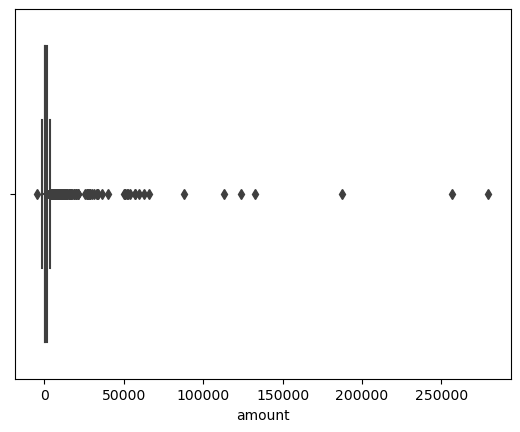

In [33]:
#outlier treatmet
#statistical outliers #Domain specific outliers
sns.boxplot(grouped_data['amount'])
plt.show()

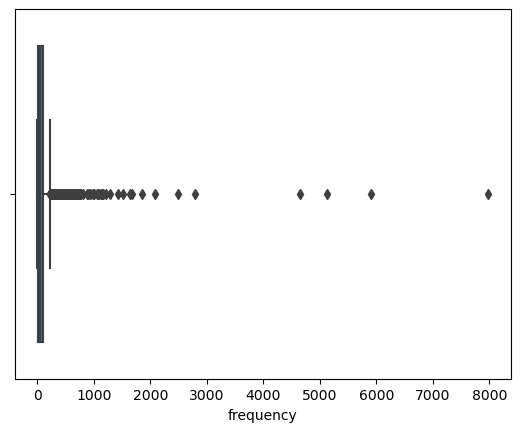

In [34]:
sns.boxplot(grouped_data['frequency'])
plt.show()

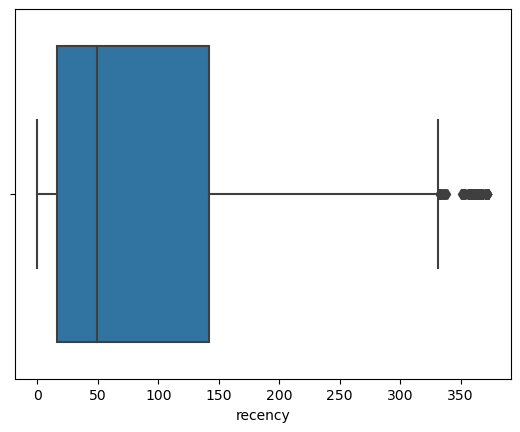

In [35]:
sns.boxplot(grouped_data['recency'])
plt.show()

In [36]:
#removing statistical outliers:
Q1= grouped_data.amount.quantile(0.05)
Q3= grouped_data.amount.quantile(0.95)
IQR=Q3-Q1
grouped_data = grouped_data[(grouped_data.amount>=Q1-1.5*IQR)&(grouped_data.amount<=Q3+1.5*IQR)]

In [37]:
#removing statistical outliers:
Q1= grouped_data.recency.quantile(0.05)
Q3= grouped_data.recency.quantile(0.95)
IQR=Q3-Q1
grouped_data = grouped_data[(grouped_data.recency>=Q1-1.5*IQR)&(grouped_data.recency<=Q3+1.5*IQR)]

In [38]:
#removing statistical outliers:
Q1= grouped_data.frequency.quantile(0.05)
Q3= grouped_data.frequency.quantile(0.95)
IQR=Q3-Q1
grouped_data = grouped_data[(grouped_data.frequency>=Q1-1.5*IQR)&(grouped_data.frequency<=Q3+1.5*IQR)]

In [39]:
#rescaling
from sklearn.preprocessing import StandardScaler

In [40]:
rfm_data = grouped_data[['amount','frequency','recency']]
rfm_data.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [41]:
scaler = StandardScaler()
rfm_data_scaled = scaler.fit_transform(rfm_data)

In [42]:
rfm_data_scaled.shape

(4293, 3)

In [43]:
rfm_data_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [44]:
#Hopkins
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
rfm_data_scaled = pd.DataFrame(rfm_data_scaled)
rfm_data_scaled.columns = ['amount', 'frequency', 'recency']

In [46]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_data_scaled)

0.9552035710687715

## Modelling:

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=4,max_iter =50)
kmeans.fit(rfm_data_scaled)

KMeans(max_iter=50, n_clusters=4)

In [49]:
kmeans.labels_

array([0, 3, 1, ..., 0, 1, 1])

In [50]:
len(kmeans.labels_)

4293

## Optimal Number of clusters:

In [51]:
# The elbow curve:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
    kmeans.fit(rfm_data_scaled)
    ssd.append(kmeans.inertia_)
#plot the SSD's for each n_clusters 

In [52]:
ssd

[7661.705869320753,
 4433.580619302121,
 3360.376320215202,
 2802.8241284834658,
 2392.040997845539,
 2039.0476210768206,
 1825.948201062743]

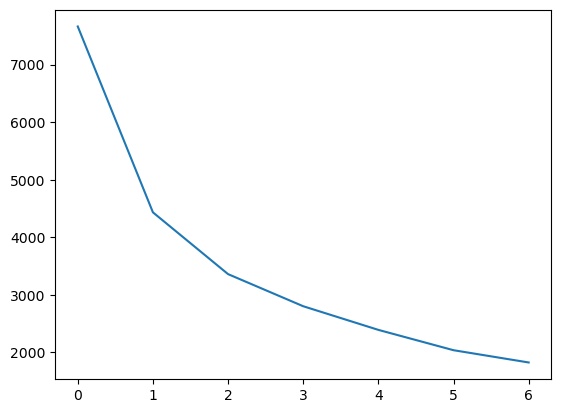

In [53]:
plt.plot(ssd)

In [54]:
#Silhouette Analysis:
from sklearn.metrics import silhouette_score

In [55]:
range_n_clusters = [2,3,4,5,6,7,8]


In [56]:
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_data_scaled)
   
    cluster_labels = kmeans.labels_
    
    silhouette_avg=silhouette_score(rfm_data_scaled, cluster_labels)
    print(f'For n clusters={num_clusters}, the silhouette score is {silhouette_avg}')

For n clusters=2, the silhouette score is 0.5415858652525395
For n clusters=3, the silhouette score is 0.5084896296141937
For n clusters=4, the silhouette score is 0.48148099614734263
For n clusters=5, the silhouette score is 0.46613075550600325
For n clusters=6, the silhouette score is 0.41773142554966397
For n clusters=7, the silhouette score is 0.415794978066716
For n clusters=8, the silhouette score is 0.40013069859978534


In [57]:
#Cluster Analysis:
#final model with k =3
kmeans =KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_data_scaled)


KMeans(max_iter=50, n_clusters=3)

In [58]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [59]:
#assign the labels to customer-ID
grouped_data.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [60]:
grouped_data['Cluster_ID'] = kmeans.labels_
grouped_data.head()

,CustomerID,amount,frequency,recency,Cluster_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='Cluster_ID', ylabel='amount'>

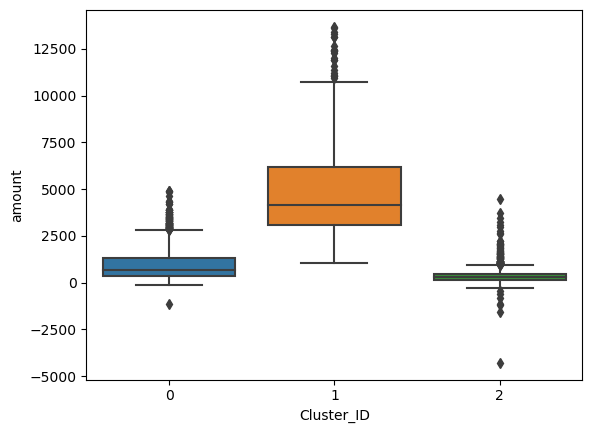

In [61]:
sns.boxplot(x='Cluster_ID',y='amount',data=grouped_data)

<AxesSubplot:xlabel='Cluster_ID', ylabel='recency'>

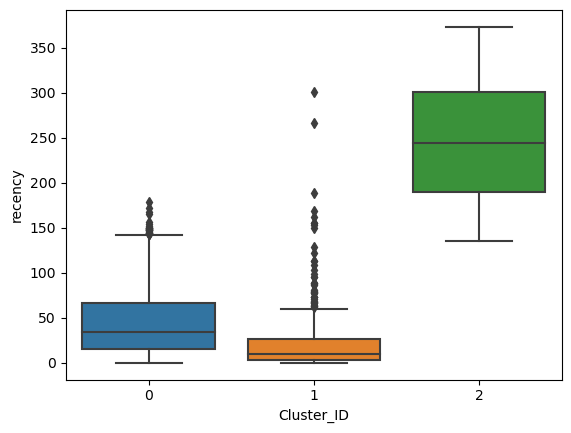

In [62]:
sns.boxplot(x='Cluster_ID',y='recency',data=grouped_data)

<AxesSubplot:xlabel='Cluster_ID', ylabel='frequency'>

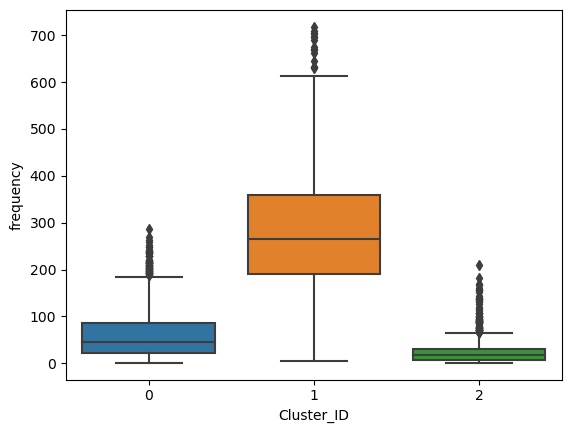

In [63]:
sns.boxplot(x='Cluster_ID',y='frequency',data=grouped_data)

# Hierarchical:

In [64]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [65]:
rfm_data_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [66]:
grouped_data.head()

,CustomerID,amount,frequency,recency,Cluster_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [67]:
#single linkage:
mergings = linkage(rfm_data_scaled, method='single', metric ='euclidean')

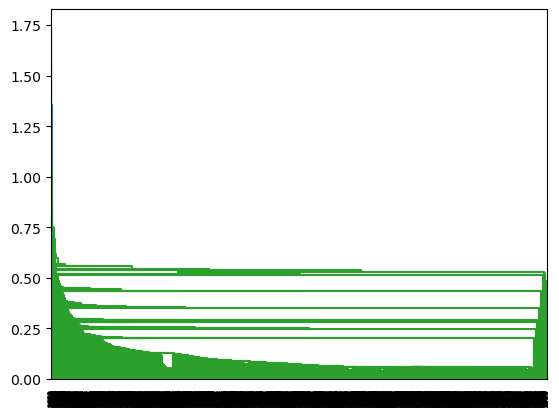

In [68]:
dendrogram(mergings)
plt.show()

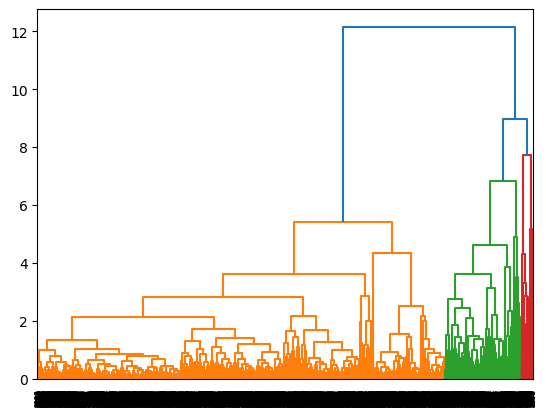

In [69]:
#complete linkage:
mergings = linkage(rfm_data_scaled, method = 'complete', metric ='euclidean')
dendrogram(mergings)
plt.show()

In [70]:
cut_tree(mergings,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [71]:
cut_tree(mergings,n_clusters=3).shape

(4293, 1)

In [72]:
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1, )

In [73]:
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [74]:
grouped_data['cluster_labels'] = cluster_labels

In [75]:
grouped_data.head()

,CustomerID,amount,frequency,recency,Cluster_ID,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_labels', ylabel='amount'>

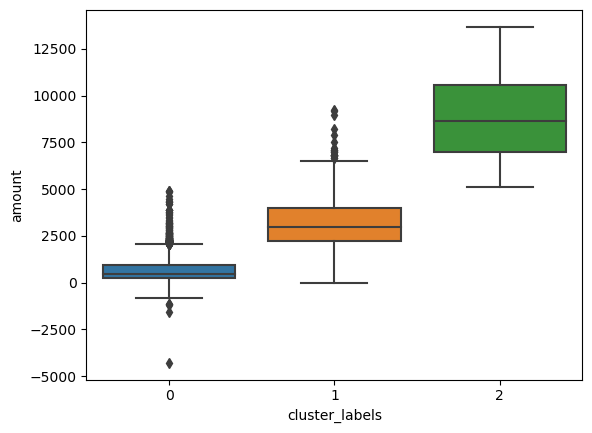

In [76]:
sns.boxplot(x='cluster_labels',y='amount',data=grouped_data)

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

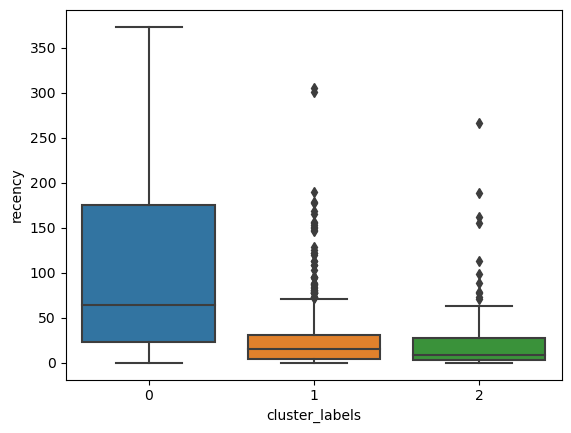

In [77]:
sns.boxplot(x='cluster_labels',y='recency',data=grouped_data)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

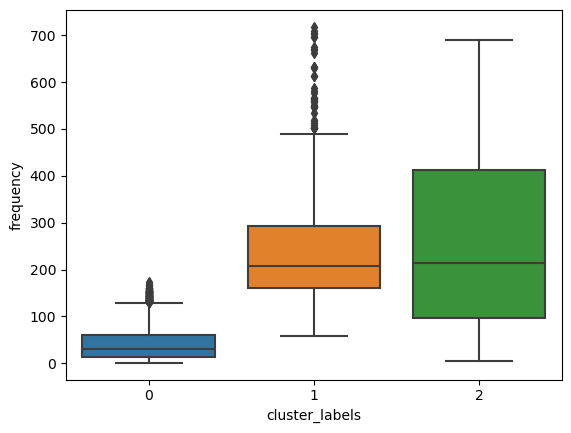

In [78]:
sns.boxplot(x='cluster_labels',y='frequency',data=grouped_data)

#conclusion:
By using Kmeans clustering and hierarchcial clustering, we segmented the customers into 3 segments.